# Matplotlib & Seaborn

## Overview

matplotlib is a python 2D plotting library built on the top of the basic Python language and Numpy.
More about matplotlib can be found in its [documentation](http://matplotlib.org/contents.html).

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Here is the [documentation](http://seaborn.pydata.org/index.html).

To display the graph inside IPython notebook, run the following code.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Begin by making a simple plot matplotlib.  Create a set of x-coordinates and y-coordinates.  Then plot them, as follows:

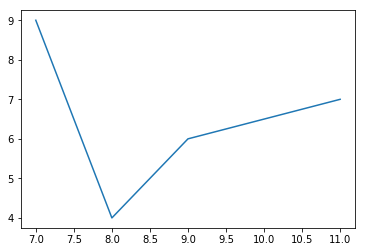

In [2]:
x=[7,8,9,11]
y=[9,4,6,7]
plt.plot(x,y)

In [3]:
#for information on plot function
?plt.plot

The style of the plot can be set in several ways.  The line style, color, marker size, line width and opacity may be set using additional parameters.  Multiple series can also be plotted in the the same graph.

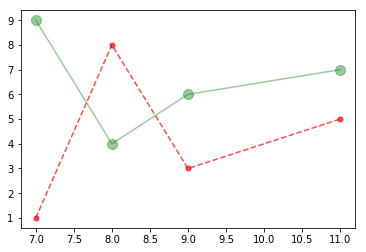

In [6]:
plt.plot(x,y,'.-',color='green',markersize=20,alpha=0.4)
y2=[1,8,3,5]
plt.plot(x,y2,'.--',color='red',markersize=10,alpha=0.7)

The plot can also be given a legend, title and labels on the x and y axis.  The range and tick marks can also be set for the axes.  Text can be added to the plot as well.  These are all sown in the following graph.

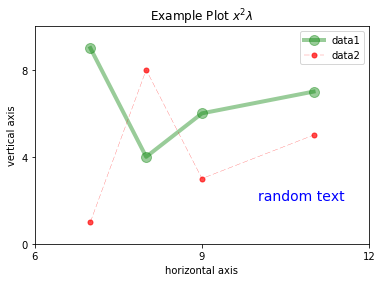

In [7]:
plt.plot(x,y,'.-',color='green',markersize=20,
         linewidth=4,alpha=0.4,label='data1')
plt.plot(x,y2,'.--',color='red',markersize=10,alpha=0.7,
         linewidth=0.3,label='data2')
plt.legend(loc=1)
plt.title('Example Plot $x^2\lambda$')
plt.xlabel('horizontal axis')
plt.ylabel('vertical axis')
plt.xlim(6,12)
plt.ylim(0,10)
plt.xticks([6,9,12])
plt.yticks([0,4,8])
plt.text(10,2,'random text',color='blue',size=14)

One-dimensional numpy arrays may also be used as data series.  Below a sin function is plotted.

The resulting plot may be saved as an image.

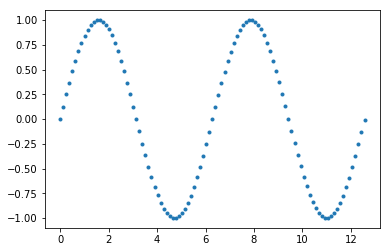

In [8]:
X=np.linspace(0,4*3.14,101)
Y=np.sin(X)
plt.plot(X,Y,'.')

### save file
plt.savefig('myplot.png')

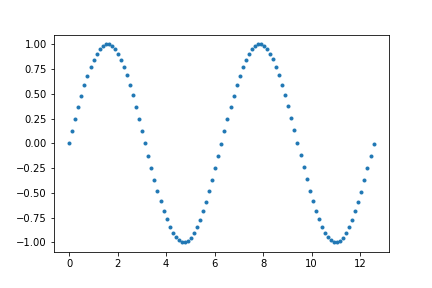

In [9]:
#the resulting image
from IPython.display import Image
Image('myplot.png')

Bar plots are another type of graph which can be redered.

<Container object of 51 artists>

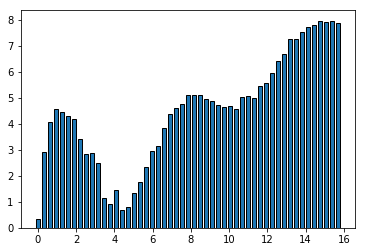

In [12]:
t=np.linspace(0,5*3.14,51)
s=(9*np.sin(t)/((t+1)))+0.5*t+3*(np.random.randn(51)/(2+t/2.5))**2
plt.bar(t,s,edgecolor='black', width=0.2)

<Container object of 10 artists>

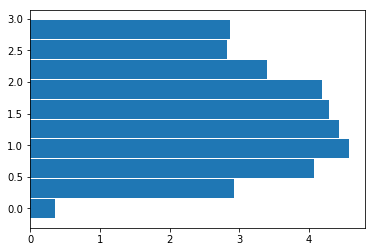

In [15]:
#horizontal bar plot
plt.barh(t[:10],s[:10], height=0.3)

Scatter plots are also useful.  

Below are four 2-D standard normal distributions centered at (2,2),(2,-2),(-2,2),(-2,-2)

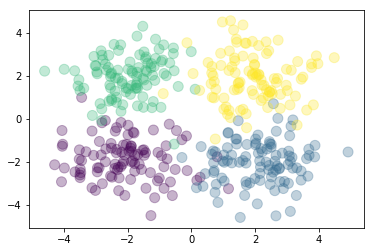

In [19]:
N=400
D=2

X=np.random.randn(N,D)

X[:200,:] = X[:200,:] - 2*np.ones((200,D))
X[200:,:] = X[200:,:] + 2*np.ones((200,D))
X[100:300,0]=-X[100:300,0]

#note how colors are assigned with a list
T=np.array([0]*100 + [1]*100 + [2]*100 + [3]*100)
 
plt.scatter(X[:,0],X[:,1],c=T,s=100, alpha=0.3)

**Exercise 0**

The code below creates a pandas data frame from the file 'gold_hist.txt'.  It contains historical gold prices (end of year) from 1792 to 2015.

- Plot the data with time on the horizontal axis and gold price on the vertical.  Provide a title and labels for the horizontal and vertical axes.
- Plot the the data again using a log vertical scale.
Use `plt.yscale('log')`

- The US dollar was removed from a gold standard in 1973.  Plot the data again, on a linear scale (normal scale), from 1972 and after.  Label the point representing peak price.  

In [20]:
f = open('gold_hist.txt', 'r')
lines = f.readlines()
f.close()
lines=list(map(lambda x: x.strip() ,lines))
prices=[[int(lines[2*i]),float(lines[2*i+1][1:].replace(',',''))]\
        for i in range(int(len(lines)/2)) ]
prices.sort()
gold=pd.DataFrame(prices,columns=['year','price'])
gold.head(2)


,year,price
0,1792,19.39
1,1793,19.39


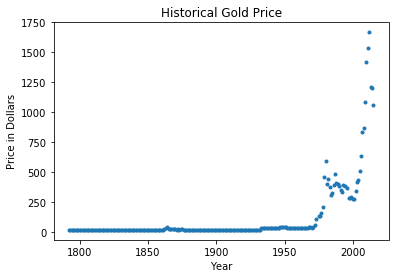

In [30]:
#your code here
P=gold['price']
T=gold['year']
plt.plot(T,P,'.')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Historical Gold Price')

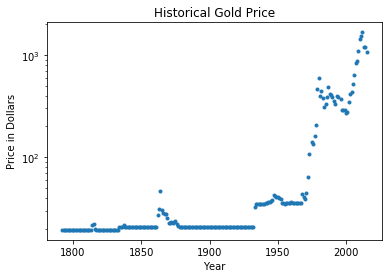

In [31]:
P=gold['price']
T=gold['year']
plt.plot(T,P,'.')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.yscale('log')
plt.title('Historical Gold Price')

In [32]:
high=gold.price.max()
high

1664.0

In [36]:
int(gold.loc[gold.price==high].iloc[0,0])

2012

In [38]:
#gold.loc[gold.year>1971]

In [42]:
peak_year=gold.loc[gold.price==peak_price,'year'].tolist()[0]
peak_year

2012

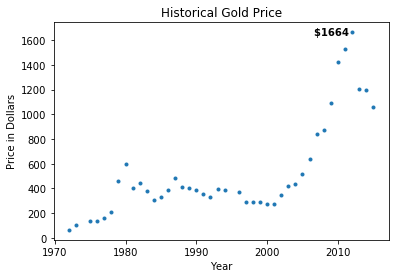

In [45]:
peak_price=gold['price'].max()
#peak_year=gold.loc[gold.price==peak_price,'year'].tolist()[0]
peak_year=int(gold.loc[gold.price==high].iloc[0,0])

gold72=gold[gold['year']>=1972]
P=gold72['price']
T=gold72['year']
plt.plot(T,P,'.')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Historical Gold Price')
plt.text(peak_year,peak_price,'$%i '%(peak_price),color='black',size=10,
          fontweight='bold',verticalalignment='center',horizontalalignment='right')

# Case Study

For this case study use the IMDB dataset.  It was scraped and uploaded to Kaggle by Sun Chuan (graduate of Bootcamp 6). Check it out [here](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset). 

Load the data first.

In [46]:
df = pd.read_csv('movie_metadata.csv')

In [47]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [48]:
df.shape

(5043, 28)

To display the full data frame set the maximum number of columns shown, as follows:

In [49]:
pd.set_option('display.max_columns', df.shape[1])

In [50]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Describe will exclude the missing value by default.

In [51]:
#df.describe()
df.dropna().describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


`value_counts()` will return a frequency count for every value in a column.

In [52]:
df['language'].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Russian         11
Cantonese       11
Italian         11
Korean           8
Portuguese       8
Swedish          5
Hebrew           5
Danish           5
Arabic           5
Persian          4
Norwegian        4
Polish           4
Dutch            4
Chinese          3
Thai             3
Romanian         2
None             2
Zulu             2
Dari             2
Aboriginal       2
Icelandic        2
Indonesian       2
Czech            1
Maya             1
Kannada          1
Kazakh           1
Greek            1
Filipino         1
Mongolian        1
Telugu           1
Slovenian        1
Aramaic          1
Tamil            1
Bosnian          1
Dzongkha         1
Vietnamese       1
Urdu             1
Swahili          1
Hungarian        1
Panjabi          1
Name: language, dtype: int64

In [53]:
df['director_name'].value_counts()

Steven Spielberg        26
Woody Allen             22
Martin Scorsese         20
Clint Eastwood          20
Ridley Scott            17
Spike Lee               16
Steven Soderbergh       16
Tim Burton              16
Renny Harlin            15
Oliver Stone            14
Robert Zemeckis         13
Sam Raimi               13
Joel Schumacher         13
Ron Howard              13
John Carpenter          13
Michael Bay             13
Barry Levinson          13
Robert Rodriguez        13
Richard Donner          12
Peter Jackson           12
Tony Scott              12
Kevin Smith             12
Shawn Levy              12
Wes Craven              12
Brian De Palma          12
Stephen Frears          11
Francis Ford Coppola    11
Chris Columbus          11
Rob Reiner              11
Rob Cohen               11
                        ..
Conor McPherson          1
Kate Connor              1
David Winning            1
James Ponsoldt           1
Gnana Rajasekaran        1
Noam Murro               1
A

# Histogram

(array([   16.,    38.,   102.,   222.,   579.,  1158.,  1515.,  1085.,
          307.,    21.]),
 array([ 1.6 ,  2.39,  3.18,  3.97,  4.76,  5.55,  6.34,  7.13,  7.92,
         8.71,  9.5 ]),
 <a list of 10 Patch objects>)

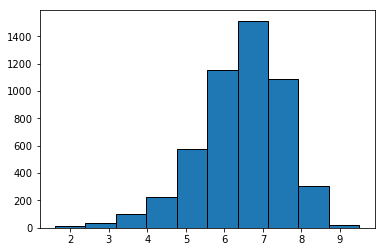

In [54]:
plt.hist(df['imdb_score'],edgecolor='k')

Explore some of the available parameters by placing the cursor inside the function parentheses and pressing **shift+tab**

It is possible to set the color and the number of bins. For color, type `"blue"` or `"b"` for short. Color accepts hex color code, pick a color from this [website](http://www.color-hex.com/) and paste the hexadecimal code.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


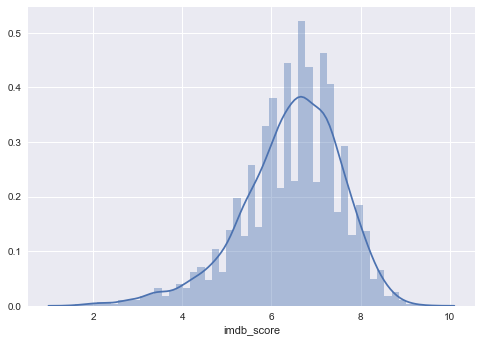

In [55]:
import seaborn as sns
sns.distplot(df['imdb_score'])

(array([   5.,   11.,   12.,   26.,   51.,   51.,   95.,  127.,  217.,
         362.,  497.,  661.,  795.,  720.,  666.,  419.,  226.,   81.,
          18.,    3.]),
 array([ 1.6  ,  1.995,  2.39 ,  2.785,  3.18 ,  3.575,  3.97 ,  4.365,
         4.76 ,  5.155,  5.55 ,  5.945,  6.34 ,  6.735,  7.13 ,  7.525,
         7.92 ,  8.315,  8.71 ,  9.105,  9.5  ]),
 <a list of 20 Patch objects>)

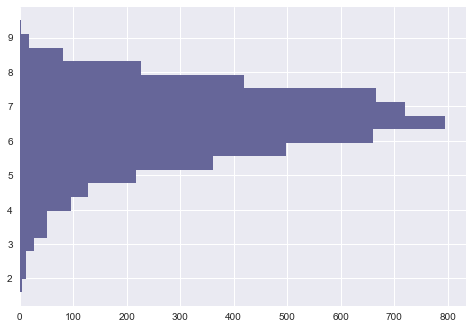

In [56]:
plt.hist(df['imdb_score'], bins=20, color="#666699", orientation="horizontal")

### Exercise 1

- Create a histogram of the budget column. Does Python raise an error? Fix it by following this [Stack Overflow Link](http://stackoverflow.com/q/20656663)

- How does the graph look? Is there anyway to improve this? What does the x-axis stand for? 
- All the code in the same cell will contribute to the same plot.
- Type `plt.` and press tab to get a hint.

(array([  4.54600000e+03,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.18000000e+02,   1.22155020e+09,   2.44310017e+09,
          3.66465015e+09,   4.88620013e+09,   6.10775011e+09,
          7.32930009e+09,   8.55085007e+09,   9.77240004e+09,
          1.09939500e+10,   1.22155000e+10]),
 <a list of 10 Patch objects>)

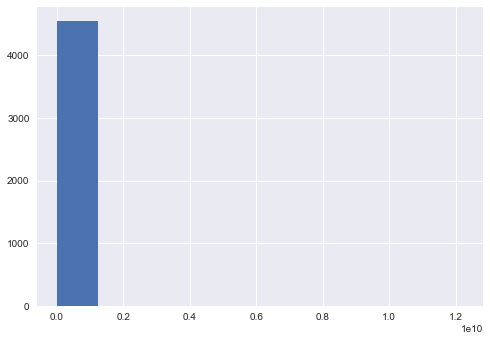

In [58]:
#### Your code here
plt.hist(df.budget.dropna())

In [61]:
df.sort_values('budget',ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973
3423,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,Action|Animation|Sci-Fi,Mitsuo Iwata,Akira,106160,28,Tesshô Genda,0.0,based on manga|biker gang|gifted child|post th...,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0
4542,Color,Takao Okawara,107.0,99.0,2.0,3.0,Naomi Nishida,43.0,10037390.0,Action|Adventure|Drama|Sci-Fi|Thriller,Hiroshi Abe,Godzilla 2000,5442,53,Sakae Kimura,0.0,godzilla|kaiju|monster|orga|ufo,http://www.imdb.com/title/tt0188640/?ref_=fn_t...,140.0,Japanese,Japan,PG,1.000000e+09,1999.0,3.0,6.0,2.35,339
3075,Color,Karan Johar,20.0,193.0,160.0,860.0,John Abraham,8000.0,3275443.0,Drama,Shah Rukh Khan,Kabhi Alvida Naa Kehna,13998,10822,Preity Zinta,2.0,extramarital affair|fashion magazine editor|ma...,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,264.0,Hindi,India,R,7.000000e+08,2006.0,1000.0,6.0,2.35,659
3851,Color,Carlos Saura,35.0,115.0,98.0,4.0,Juan Luis Galiardo,341.0,1687311.0,Drama|Musical,Mía Maestro,Tango,2412,371,Miguel Ángel Solá,3.0,dancer|director|love|musical filmmaking|tango,http://www.imdb.com/title/tt0120274/?ref_=fn_t...,40.0,Spanish,Spain,PG-13,7.000000e+08,1998.0,26.0,7.2,2.00,539
3273,Color,Anurag Basu,41.0,90.0,116.0,303.0,Steven Michael Quezada,594.0,1602466.0,Action|Drama|Romance|Thriller,Bárbara Mori,Kites,9673,1836,Kabir Bedi,0.0,casino|desert|love|suicide|tragic event,http://www.imdb.com/title/tt1198101/?ref_=fn_t...,106.0,English,India,NaN,6.000000e+08,2010.0,412.0,6.0,NaN,0


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(array([ 990.,  696.,  395.,  285.,  172.,  123.,   74.,   52.,   42.,
          59.,   16.,   28.,   11.,   22.,   10.,    2.,    5.,    4.,
           0.,    1.]),
 array([  2.18000000e+02,   1.50002071e+07,   3.00001962e+07,
          4.50001853e+07,   6.00001744e+07,   7.50001635e+07,
          9.00001526e+07,   1.05000142e+08,   1.20000131e+08,
          1.35000120e+08,   1.50000109e+08,   1.65000098e+08,
          1.80000087e+08,   1.95000076e+08,   2.10000065e+08,
          2.25000054e+08,   2.40000044e+08,   2.55000033e+08,
          2.70000022e+08,   2.85000011e+08,   3.00000000e+08]),
 <a list of 20 Patch objects>)

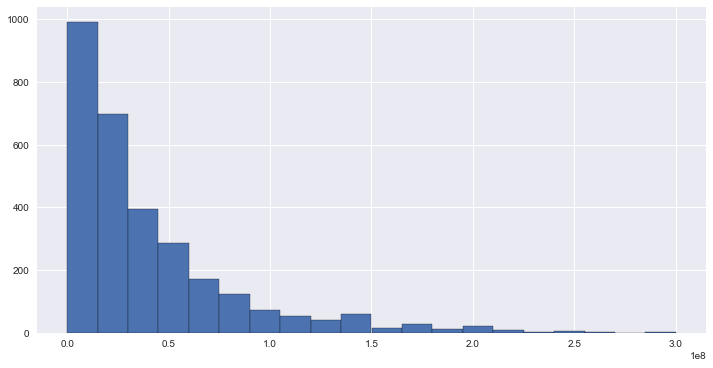

In [62]:
plt.figure(figsize=(12,6)) # This line changes the size of the plot. The width and height are in inches.
plt.hist(df.dropna()[df.country=='USA']['budget'],bins=20,edgecolor='k')

- Pandas dataframe also provides plotting function. It is calling the matplotlib library behind the scenes.
- Check all the available plots from the documenation [here](http://pandas.pydata.org/pandas-docs/version/0.19.2/visualization.html#visualization)

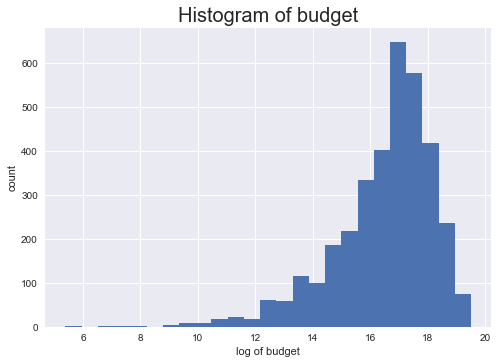

In [63]:
np.log(df[df.country=='USA']['budget']).plot.hist(bins=25)
plt.xlabel('log of budget')
plt.ylabel('count')
plt.title('Histogram of budget', fontsize=20)

# Scatterplot
Scatterplots are useful for bivariate analysis. We can check the relationship between two columns.
Suppose we want to figure out whether there is a relationship between the gross income and the budget.

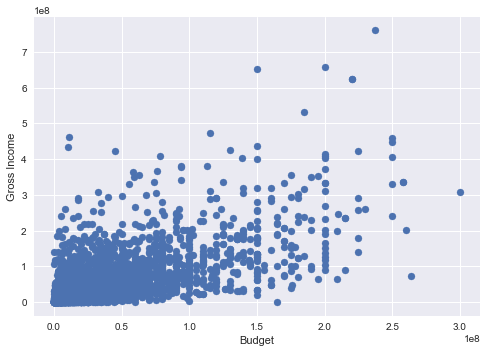

In [65]:
plt.scatter(df[df.country=='USA']['budget'], df[df.country=='USA']['gross'])
plt.xlabel('Budget')
plt.ylabel('Gross Income')

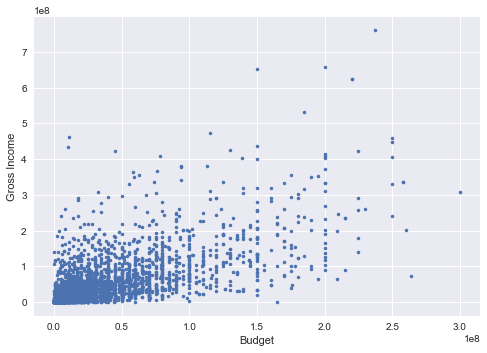

In [66]:
#another way
plt.plot(df[df.country=='USA']['budget'], df[df.country=='USA']['gross'],'.')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

Here is a way to plot it using the plotting function from pandas.

In [67]:
df1=df[df.country=='USA']

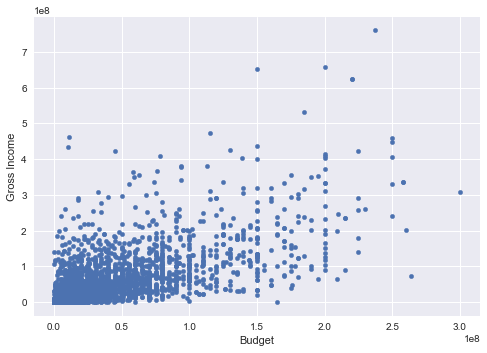

In [68]:
df1.plot(x='budget', y='gross',kind='scatter')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

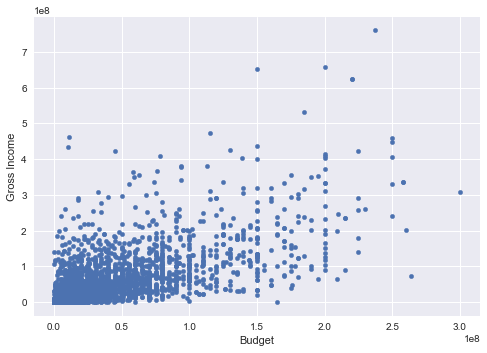

In [69]:
#another way
df1.plot.scatter(x='budget', y='gross')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

There are some outliers which make the graph less useful. Remove them from the dataframe using the apply function.

In [70]:
scatter_df = df1[['gross', 'budget']]
scatter_df = scatter_df[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

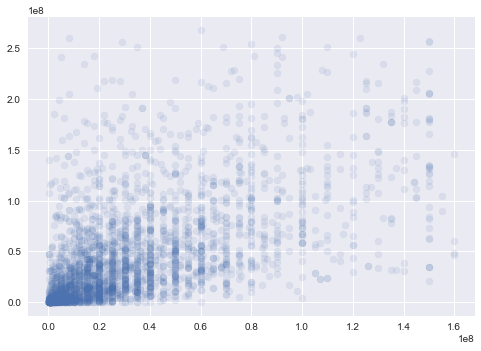

In [71]:
plt.scatter(scatter_df['budget'], scatter_df['gross'],alpha=0.1)

Now take a look at those outliers. In the previous example the ouliers were removed. Use the **~** symbol to invert the boolean mask. 

In [73]:
not True

False

In [74]:
~pd.DataFrame([[True]])

,0
0,False


In [75]:
~pd.DataFrame([[False]])

,0
0,True


Merge the outlier dataframe with the original other features.  Sort by budget in descending order.

In [76]:
outliers = df1[['gross', 'budget']].dropna()
outliers = outliers[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
outliers.merge(df)[['gross', 'budget', 'movie_title']].sort_values(by='budget', ascending=False)

,gross,budget,movie_title
1,309404152.0,300000000.0,Pirates of the Caribbean: At World's End
3,73058679.0,263700000.0,John Carter
8,200807262.0,260000000.0,Tangled
4,336530303.0,258000000.0,Spider-Man 3
5,336530303.0,258000000.0,Spider-Man 3
6,336530303.0,258000000.0,Spider-Man 3
7,336530303.0,258000000.0,Spider-Man 3
20,241063875.0,250000000.0,Pirates of the Caribbean: On Stranger Tides
2,448130642.0,250000000.0,The Dark Knight Rises
9,458991599.0,250000000.0,Avengers: Age of Ultron


Examine the relationship between imdb_score and gross income. 

In [77]:
score_df = df1[['gross', 'imdb_score']].dropna()
#score_df = score_df[score_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

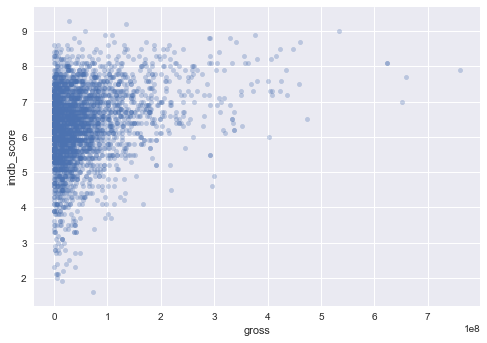

In [78]:
score_df.plot.scatter('gross', 'imdb_score',alpha=0.3)

In [80]:
df1=df1.dropna()
df1['p_factor']=df1['gross']/df1['budget']

In [87]:
pscore_df = df1[df1.p_factor<100][['p_factor', 'imdb_score']].dropna()

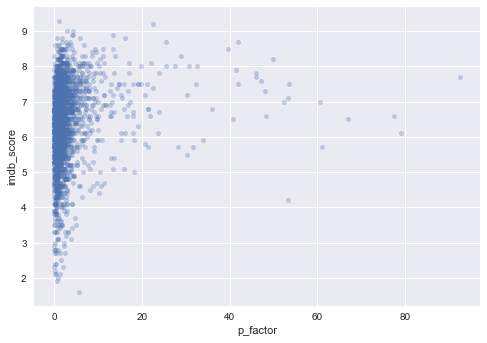

In [88]:
pscore_df.plot.scatter('p_factor', 'imdb_score',alpha=0.3)

### Exercise 2
- How is gross income related to director Facebook likes? 
- How is the imdb_score related to num_critic_for_reviews?

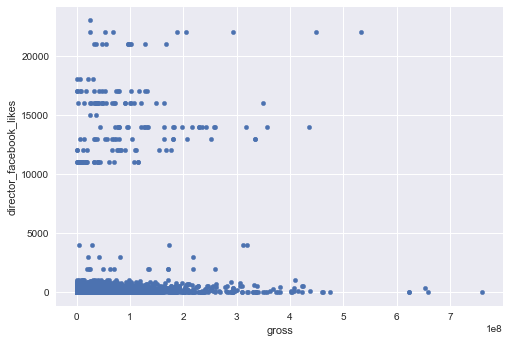

In [89]:
#### Your code here
f1='gross'
f2='director_facebook_likes'
df1[[f1, f2]].dropna().plot.scatter(f1, f2)

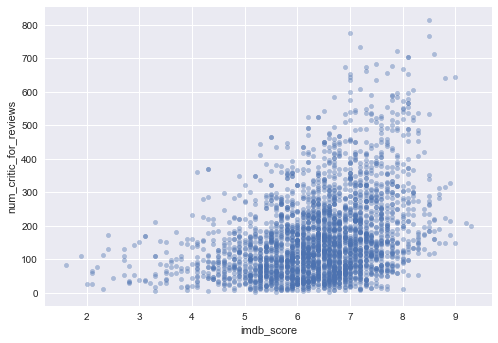

In [90]:
f1='imdb_score'
f2='num_critic_for_reviews'
df1[[f1, f2]].dropna().plot.scatter(f1, f2,alpha=0.4)

# Barplot

Barplot is often used to visualize the amount of each class in a categorical feature. It shows the difference between factors.

Below is a bar graph showing the median imdb score for different countries.  The results are shown in descending values.  What is the story this graph tells?

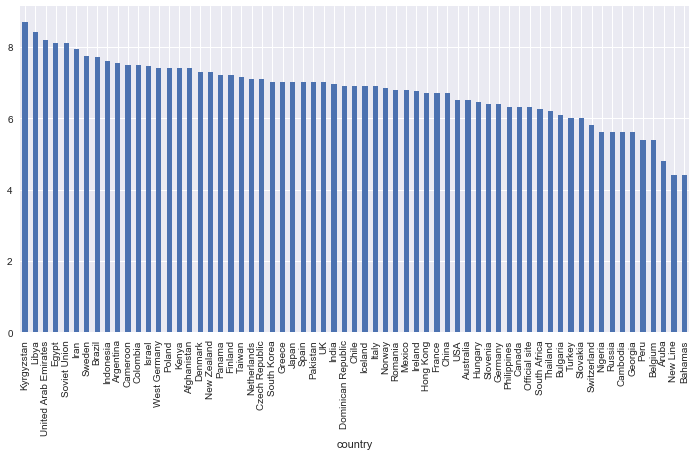

In [91]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).plot.bar()

Here are the top seven countries.

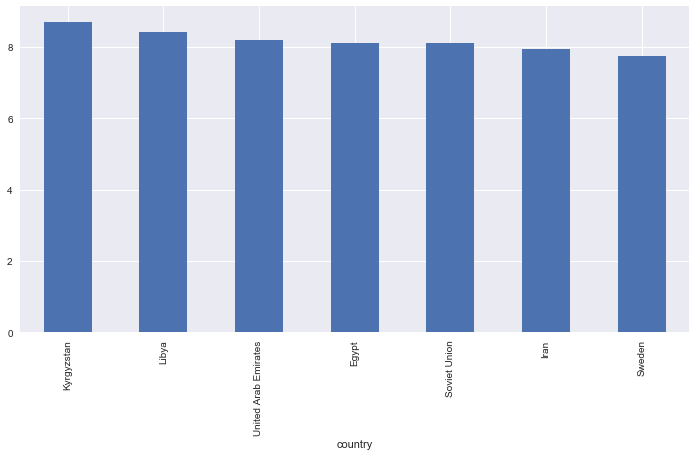

In [92]:
plt.figure(figsize=(12,6))
df.groupby('country')['imdb_score'].median().sort_values(ascending=False).head(7).plot.bar()

The next data frame examines the mean budget of movies over the last ten years.  What story does this graph tell?

In [93]:
df_clean = df1.dropna()
bar_df = df_clean.groupby('title_year')[['budget']].mean().tail(10)
bar_df

,budget
title_year,
2007.0,4.540601e+07
2008.0,4.325775e+07
2009.0,4.525024e+07
2010.0,5.388099e+07
2011.0,5.072492e+07
2012.0,5.053131e+07
2013.0,5.668649e+07
2014.0,5.227248e+07
2015.0,5.892976e+07


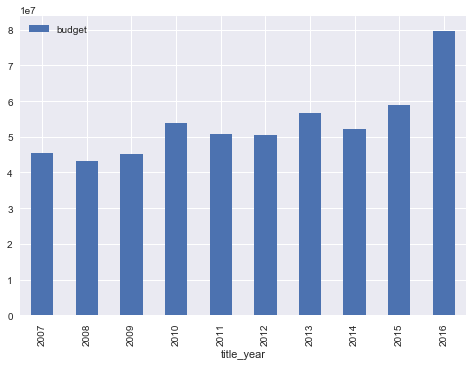

In [94]:
bar_df.index = bar_df.index.astype(np.int16)
bar_df.plot.bar()

### Genre
- Check how column features vary across different genres. This is tricky since there are many films with multiple genres separated by the `|` symbol. One solution is to duplicate each film with multiple genres into multiple rows, each with one genre. 
- Then look at the imdb distribution over all the genres.

In [95]:
df_clean = df1[['genres', 'budget', 'gross', 'title_year', 'imdb_score','movie_title']].dropna()
df_genre = pd.DataFrame(columns = ['genre', 'budget', 'gross', 'year', 'imdb_score','movie_title'])

def genreRemap(row):
    global df_genre
    d = {}
    genres = row['genres'].split('|')
    n = len(genres)
    d['genre'] = genres
    d['movie_title'] = [row['movie_title']] * n
    d['budget'] = [row['budget']] * n
    d['gross'] = [row['gross']] * n
    d['year'] = [row['title_year']] * n
    d['imdb_score'] = [row['imdb_score']] * n

    df_genre = df_genre.append(pd.DataFrame(d), ignore_index = True)

df_clean.apply(genreRemap, axis = 1)
df_genre['year'] = df_genre['year'].astype(np.int16)

In [96]:
df_genre

,budget,genre,gross,imdb_score,movie_title,year
0,237000000.0,Action,760505847.0,7.9,Avatar,2009
1,237000000.0,Adventure,760505847.0,7.9,Avatar,2009
2,237000000.0,Fantasy,760505847.0,7.9,Avatar,2009
3,237000000.0,Sci-Fi,760505847.0,7.9,Avatar,2009
4,300000000.0,Action,309404152.0,7.1,Pirates of the Caribbean: At World's End,2007
5,300000000.0,Adventure,309404152.0,7.1,Pirates of the Caribbean: At World's End,2007
6,300000000.0,Fantasy,309404152.0,7.1,Pirates of the Caribbean: At World's End,2007
7,250000000.0,Action,448130642.0,8.5,The Dark Knight Rises,2012
8,250000000.0,Thriller,448130642.0,8.5,The Dark Knight Rises,2012
9,263700000.0,Action,73058679.0,6.6,John Carter,2012


Next we can group by the genre column.  Then look at the imdb score across different genres.

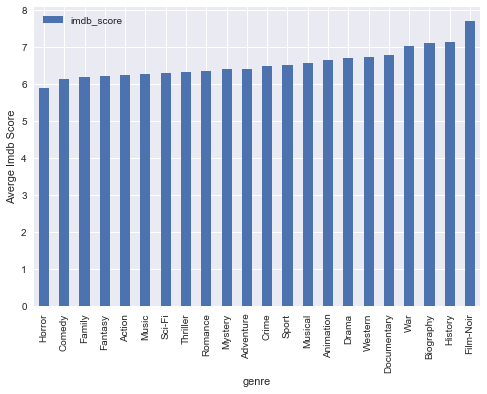

In [97]:
df_genre.groupby('genre')[['imdb_score']].mean().sort_values('imdb_score').plot.bar()
plt.ylabel('Averge Imdb Score')

### Exercise 3 
- Which genre has the highest mean budget?
- When the number of bars becomes larger try to a horizontal plot. 

In [100]:
#### Your code here
df_genre.groupby('genre')['budget'].mean().sort_values(ascending=False).index[0]

'Animation'

In [121]:
df_genre.groupby('genre').agg({'budget':['mean','std']})[('budget','mean')].sort_values(ascending=False).index[0]

'Animation'

# Boxplot
- A boxplot is another way to visualize the distribution of a numeric feature. Let Q1, Q2 and Q3 represent the 25%, 50% and 75% quantile, respectively.
- A Boxplot is made of five quantiles: Q1−1.5(Q3−Q1), Q1, Q2, Q3, and Q3+1. 5(Q3−Q1). It can be made by function boxplot.

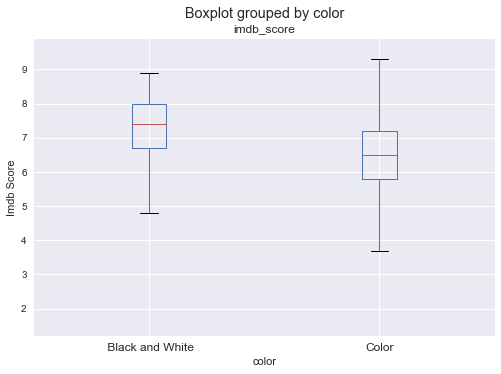

In [122]:
df_score = df[['color', 'imdb_score']].dropna()
df_score.boxplot(by='color', column='imdb_score')
plt.ylabel('Imdb Score')

### Exercise 4
What is the duration distribution for different kinds of posters?

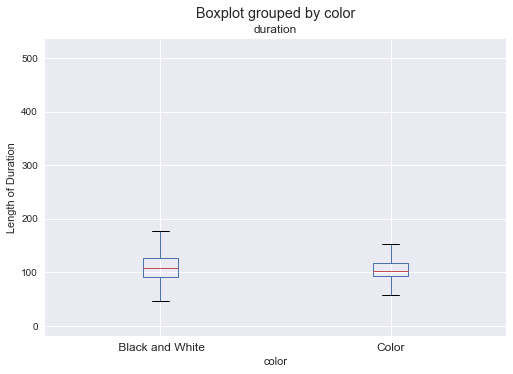

In [123]:
#### Your code here
df_dur = df[['color', 'duration']]
df_dur.boxplot(by='color', column='duration')
plt.ylabel('Length of Duration')


# Seaborn

In [124]:
import seaborn as sns

Seaborn provides functionality to infer a distribution from the sample data.  This is known as kernel density estimation.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


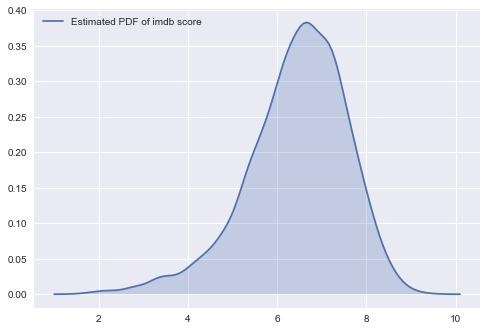

In [125]:
sns.kdeplot(df['imdb_score'], shade=True, label='Estimated PDF of imdb score')

It is possible to combine histogram and the distribution estimate plot:

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


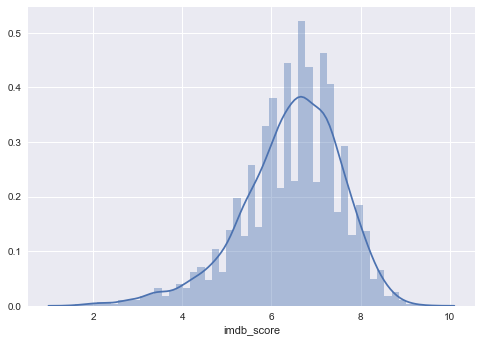

In [126]:
sns.distplot(df['imdb_score'])

The joinplot() function combines histogram and scatter plot.

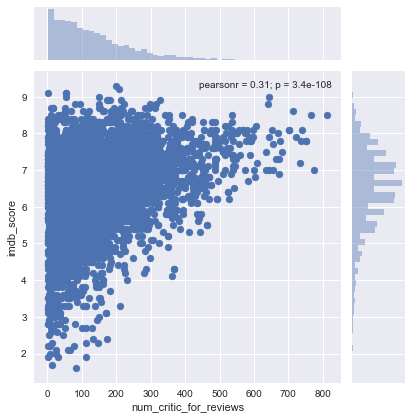

In [127]:
sns.jointplot(df['num_critic_for_reviews'], df['imdb_score'])

The "pearsonr=0.31" indicates the pearson correlation of these two variables. The p value is pretty small, indicating that there is a significant linear relation between the two variables.

Visualize the distribution of multiple features by using boxplot:

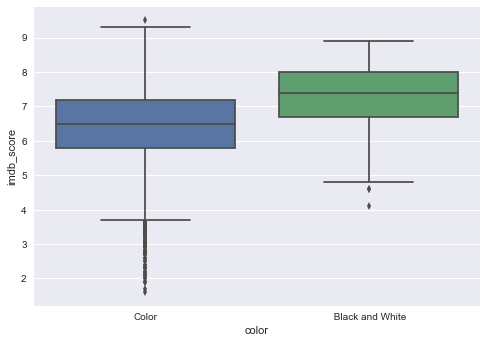

In [128]:
sns.boxplot(x='color', y='imdb_score', data=df)

### Advanced plots
Seaborn also provides another famous sample dataset named "tips":

In [129]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


This is a famous dataset record the information of people of different sex, being a smoker or not, visiting at different day or for different meal, the size of parties they joined, and the tip and the total bill they pay.

To visualize the relation between total_bill and tip, use scatter plot. Seaborn performs linear fitting as well.

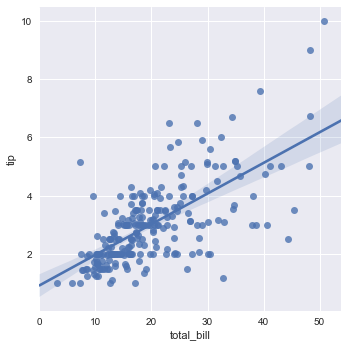

In [130]:
sns.lmplot("total_bill", "tip", tips)

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


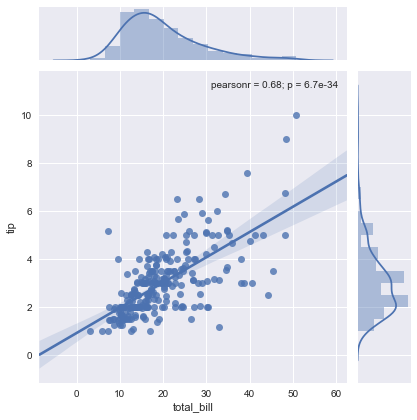

In [131]:
sns.jointplot("total_bill", "tip", tips,kind='reg')

Visualize "Male" and "Female" data points, represented by hue.

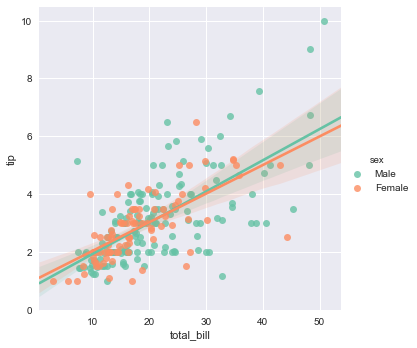

In [132]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette="Set2")

Pass a dictionary to the palette argument, specifying the color of each level in the hue variable.

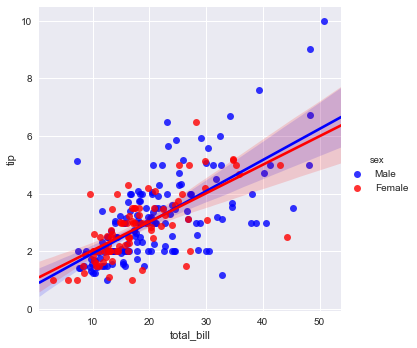

In [133]:
sns.lmplot("total_bill", "tip", tips, hue="sex", palette={"Male": "b", "Female": "r"})

Here:
- hue indicates the column categorical feature used to split the data
- palette specifies the color used in the graphic

To compare the same kind of plot for different features, faceting is useful.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


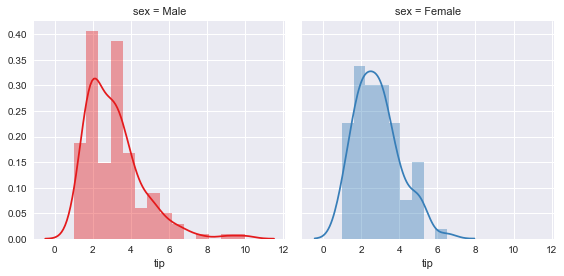

In [134]:
SexGrid = sns.FacetGrid(tips, col='sex', hue="sex", palette="Set1", size=4)
SexGrid.map(sns.distplot, "tip")

Above the column and hue are mapped to the same categorical feature.  Below column and hue are mapped to different categorical features.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


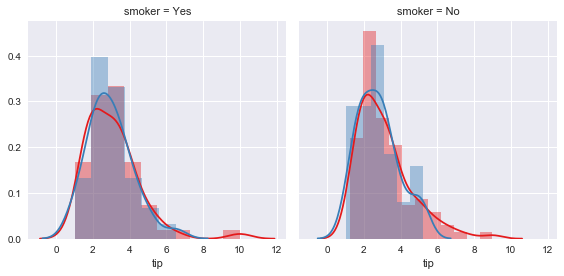

In [135]:
SexGrid = sns.FacetGrid(tips, col='smoker', hue="sex", palette="Set1", size=4)
SexGrid.map(sns.distplot, "tip")

FacetGrid() offers three ways to split data: hue, column and row.  The .map() method specifies the plot type and the x,y axes.

Facet can be used to differentiate multiple factors as well.

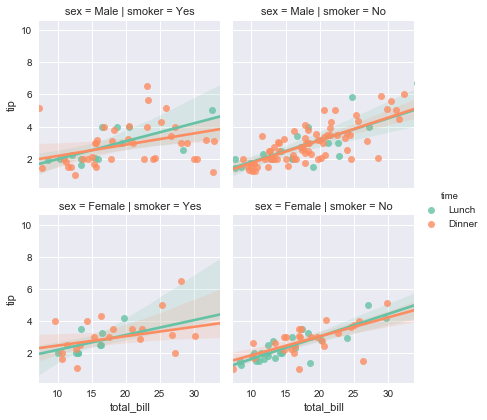

In [136]:
tipsGrid = sns.FacetGrid(tips, row='sex', col='smoker',\
                               hue='time', palette="Set2")
tipsGrid.map(sns.regplot, 'total_bill', 'tip')
tipsGrid.add_legend()

### Exercise 5
Use FacetGrid to compare the distribution of imdb score for different poster color.

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


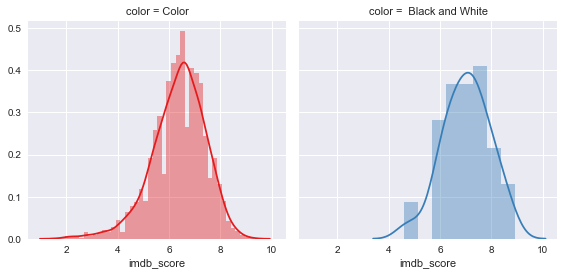

In [137]:
#### Your code here
g = sns.FacetGrid(df1, col='color', hue='color', palette='Set1', size=4)
g.map(sns.distplot, 'imdb_score')

FacetGrid helps explore specific variables and the relationships between pairs of variables, while segmenting the data set across multiple categorical features.

PairGrid explores the relationships between whole sets of numerical features.

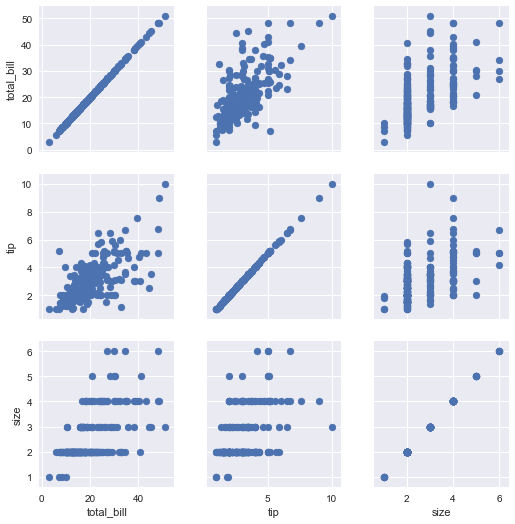

In [138]:
tipGrid = sns.PairGrid(tips)
tipGrid.map(plt.scatter)

Switching to the iris data:

In [139]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


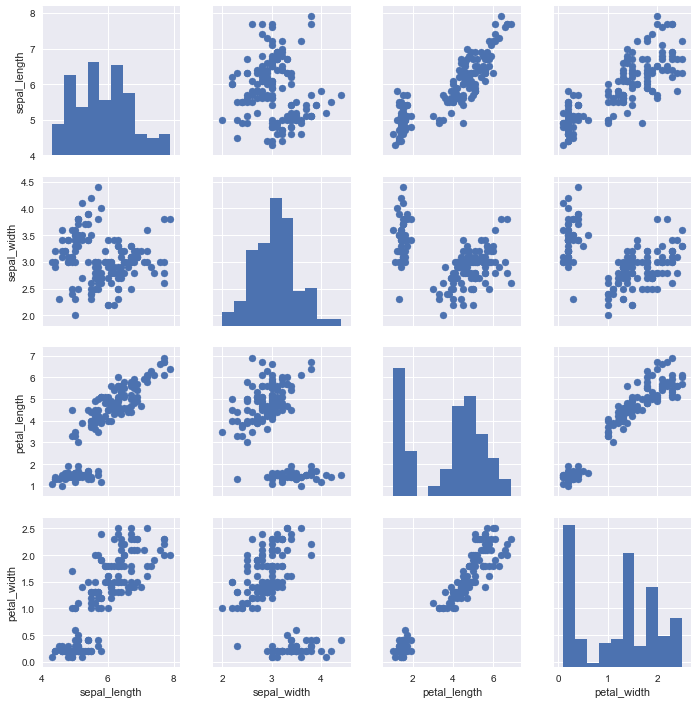

In [140]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Some examples with different type of plot and colors.

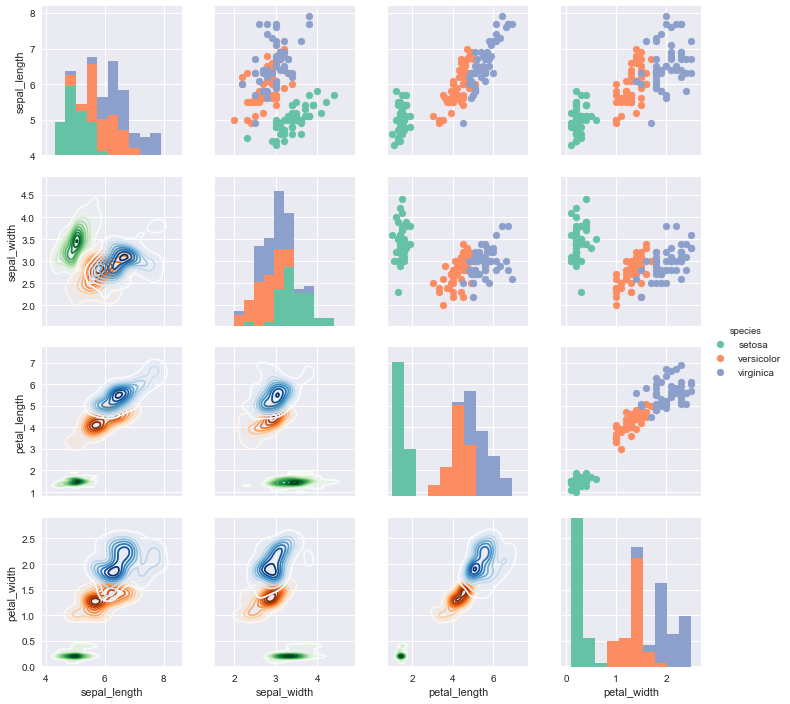

In [141]:
g = sns.PairGrid(iris, hue = 'species', palette='Set2',\
           hue_kws={'cmap':['Greens','Oranges','Blues']})

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()